In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.9998
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.9998_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9998.csv", delimiter=" ")

print(menor.shape)

(5818, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []

for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   
    
    
    

0 test error: 0.001465927491146592
1 test error: 0.002445450277402473
2 test error: 0.017847974018230427
3 test error: 0.0014752508087991934
4 test error: 0.0024639672503049158
5 test error: 0.00517352685647559
6 test error: 0.0017979152424353274
7 test error: 0.00160854869753543
8 test error: 0.0013569045991723146
9 test error: 0.0007163302259307793
10 test error: 0.0010433299658712087
11 test error: 0.0013979019813524503
12 test error: 0.006489701877021178
13 test error: 0.0013277892189764596
14 test error: 0.0013690446546201617
15 test error: 0.002474026403571322
16 test error: 0.006031303838215383
17 test error: 0.0011561726924197997
18 test error: 0.0008687114945230616
19 test error: 0.0006438883400381167
20 test error: 0.0037401453429652147
21 test error: 0.0019529157632791577
22 test error: 0.001953855823723488
23 test error: 0.001642566505415993
24 test error: 0.001654609428908247
25 test error: 0.0032145246872744867
26 test error: 0.023321031318186462
27 test error: 0.00967245

226 test error: 0.0026556726070858304
227 test error: 0.018269051338974048
228 test error: 0.00299886319821877
229 test error: 0.0014646365317676883
230 test error: 0.0017980773590701696
231 test error: 0.0054700615474221346
232 test error: 0.0018634416263497969
233 test error: 0.0011922250336210585
234 test error: 0.0032231483274733894
235 test error: 0.004236965726009022
236 test error: 0.0009830985380095672
237 test error: 0.0025132421118604855
238 test error: 0.0034852148946055957
239 test error: 0.0013709195986424552
240 test error: 0.0027841360796148082
241 test error: 0.0031936249407715275
242 test error: 0.0011104632610215723
243 test error: 0.005407270208583221
244 test error: 0.0018446207814783336
245 test error: 0.0013934162051860823
246 test error: 0.0016470558642846802
247 test error: 0.004246027491546058
248 test error: 0.0022760218310800507
249 test error: 0.0066992765112679
250 test error: 0.004969817943812272
251 test error: 0.0008687291788660213
252 test error: 0.0024

446 test error: 0.00155640497582681
447 test error: 0.0021711356583908013
448 test error: 0.005109274058122399
449 test error: 0.0028269187085624976
450 test error: 0.007346489865279457
451 test error: 0.0011820248699337778
452 test error: 0.006381756624662601
453 test error: 0.002192447737436364
454 test error: 0.00264302135427087
455 test error: 0.0020016549746080907
456 test error: 0.0010124738426761696
457 test error: 0.002776495556965729
458 test error: 0.003573537091011076
459 test error: 0.003580962009923297
460 test error: 0.005557671263071812
461 test error: 0.0023973239378379868
462 test error: 0.002229897454534323
463 test error: 0.005635678019067046
464 test error: 0.007391488188350454
465 test error: 0.0013356335806892449
466 test error: 0.0013600301311449882
467 test error: 0.004002758637839601
468 test error: 0.001279148820537711
469 test error: 0.0036073144651823795
470 test error: 0.002784507018458926
471 test error: 0.005250467091556371
472 test error: 0.0016575868730

669 test error: 0.0016445041677980695
670 test error: 0.0016951704883048163
671 test error: 0.002046058576790467
672 test error: 0.027779907393484786
673 test error: 0.0015529782299908061
674 test error: 0.0019218364975496546
675 test error: 0.0015332922002697063
676 test error: 0.0016912121873616992
677 test error: 0.0013052861955541648
678 test error: 0.0022830358344690114
679 test error: 0.002650363052987991
680 test error: 0.009257140461289786
681 test error: 0.0036282631152387136
682 test error: 0.0011237718673718958
683 test error: 0.09663703007176197
684 test error: 0.0013379584856628934
685 test error: 0.0022711750151592136
686 test error: 0.0005236579978041804
687 test error: 0.00538383656508396
688 test error: 0.0036219511832272008
689 test error: 0.010027075109560074
690 test error: 0.0021248429778490314
691 test error: 0.0024050763351988248
692 test error: 0.001807066045180274
693 test error: 0.002687319017941835
694 test error: 0.006625779023783259
695 test error: 0.000742

889 test error: 0.004585514914787863
890 test error: 0.0010433812662845104
891 test error: 0.006825392247193312
892 test error: 0.0031067783543969386
893 test error: 0.0009997442150620857
894 test error: 0.001051189029245483
895 test error: 0.001932613090961941
896 test error: 0.0025197309560760013
897 test error: 0.0036959865059349576
898 test error: 0.003976053784522889
899 test error: 0.001735018510733056
900 test error: 0.004456963389396164
901 test error: 0.00682321685663114
902 test error: 0.00931807530774364
903 test error: 0.001625475979653029
904 test error: 0.0010932356531014543
905 test error: 0.0035084878612417635
906 test error: 0.0028603237634399455
907 test error: 0.000703875998985681
908 test error: 0.0010568053625281547
909 test error: 0.0019264395629832373
910 test error: 0.0016569326821076148
911 test error: 0.0020932183399197516
912 test error: 0.005069256210114103
913 test error: 0.0024427814463242378
914 test error: 0.001183192636505222
915 test error: 0.001480011

1107 test error: 0.0009325482794930659
1108 test error: 0.005733367924481433
1109 test error: 0.017542359792151897
1110 test error: 0.0012756820685575238
1111 test error: 0.003967731536357093
1112 test error: 0.0013589657882955815
1113 test error: 0.004285184472762227
1114 test error: 0.002696104345514278
1115 test error: 0.005434430912004386
1116 test error: 0.0029985653804364444
1117 test error: 0.0017540757193944825
1118 test error: 0.002636446957411232
1119 test error: 0.0007317546569063783
1120 test error: 0.002238075645650088
1121 test error: 0.0026344448743230433
1122 test error: 0.004197140761519511
1123 test error: 0.00300945571405774
1124 test error: 0.013117258164320687
1125 test error: 0.0033755463224907924
1126 test error: 0.00220776011651516
1127 test error: 0.0012952603500590186
1128 test error: 0.0025278016368219776
1129 test error: 0.002089222834546367
1130 test error: 0.00169906058023838
1131 test error: 0.0011036468082984273
1132 test error: 0.007133709497331592
1133

1325 test error: 0.0007682054429740215
1326 test error: 0.002942206741557454
1327 test error: 0.0029963248559150817
1328 test error: 0.0017213653851272273
1329 test error: 0.004133319905550991
1330 test error: 0.0010322763691653653
1331 test error: 0.0019396200015946888
1332 test error: 0.0011990707175990754
1333 test error: 0.0017585530233666666
1334 test error: 0.00127395608587449
1335 test error: 0.008245416727311463
1336 test error: 0.0010081181924852748
1337 test error: 0.0058365076758317615
1338 test error: 0.00440637962143631
1339 test error: 0.003802998741439932
1340 test error: 0.011194539847702717
1341 test error: 0.001077032024695552
1342 test error: 0.001221932574341237
1343 test error: 0.0050610614594483495
1344 test error: 0.035798364658898074
1345 test error: 0.009554709234634874
1346 test error: 0.002000311568530961
1347 test error: 0.000851829310898902
1348 test error: 0.002144425958406649
1349 test error: 0.0025113523221864708
1350 test error: 0.002261253309660138
135

1539 test error: 0.0024046895731417326
1540 test error: 0.0021270450091843266
1541 test error: 0.0006938561007569408
1542 test error: 0.00610136599400687
1543 test error: 0.0011301193502827964
1544 test error: 0.0019410572406883568
1545 test error: 0.0020549690671399124
1546 test error: 0.0028583623223922593
1547 test error: 0.0015535332902711003
1548 test error: 0.0021042790937318714
1549 test error: 0.00350138114371265
1550 test error: 0.0005616073956240174
1551 test error: 0.012358323585239566
1552 test error: 0.002908089561069366
1553 test error: 0.0038910781179182104
1554 test error: 0.0055962670842480315
1555 test error: 0.003276969692855564
1556 test error: 0.0007907439246609563
1557 test error: 0.0022876673366703753
1558 test error: 0.0016374934952702762
1559 test error: 0.003945378145324811
1560 test error: 0.0011358088305811738
1561 test error: 0.0016234318633124353
1562 test error: 0.0008043312285664739
1563 test error: 0.002934880172622243
1564 test error: 0.000885018340841

1752 test error: 0.0035118425978188004
1753 test error: 0.0012663022135401324
1754 test error: 0.0022641226543800154
1755 test error: 0.00471271195645694
1756 test error: 0.002862762266484824
1757 test error: 0.002001643090182813
1758 test error: 0.0009897521853031216
1759 test error: 0.002428218790965724
1760 test error: 0.004630252532207347
1761 test error: 0.0016829119309072446
1762 test error: 0.0009590239422310309
1763 test error: 0.0014113367110845914
1764 test error: 0.030756433440085232
1765 test error: 0.0011990199037812154
1766 test error: 0.0009981493228292055
1767 test error: 0.005228294339330662
1768 test error: 0.004585115767330746
1769 test error: 0.0008710370623084432
1770 test error: 0.0009032863400592903
1771 test error: 0.0006921694876956235
1772 test error: 0.002674925397872796
1773 test error: 0.002233521708458759
1774 test error: 0.003462530003935615
1775 test error: 0.0018283728879403868
1776 test error: 0.0010119258300261963
1777 test error: 0.00246782435386023


1965 test error: 0.0031141903512856483
1966 test error: 0.0018253208123397674
1967 test error: 0.002752626078332739
1968 test error: 0.00666926432807599
1969 test error: 0.0033529804951579405
1970 test error: 0.0008199829664051953
1971 test error: 0.007695755950064943
1972 test error: 0.0015336472554864514
1973 test error: 0.0026234341810781048
1974 test error: 0.0015417580842665823
1975 test error: 0.0020385004877858607
1976 test error: 0.0029678009122263045
1977 test error: 0.0011767998592507982
1978 test error: 0.003014976257423169
1979 test error: 0.003959196321789176
1980 test error: 0.0010395037940970704
1981 test error: 0.0012901729281369896
1982 test error: 0.003536793176450086
1983 test error: 0.003489693185797092
1984 test error: 0.0007467997462905903
1985 test error: 0.001957133228735081
1986 test error: 0.0019653914452208436
1987 test error: 0.008188942948077383
1988 test error: 0.0034832878570452623
1989 test error: 0.004395552176297762
1990 test error: 0.00250846928323923

2178 test error: 0.002194745201228382
2179 test error: 0.00202753707868145
2180 test error: 0.002595289107182271
2181 test error: 0.014507047482558575
2182 test error: 0.0032241487058451953
2183 test error: 0.01503689393445771
2184 test error: 0.0010403612387424608
2185 test error: 0.0033511785795959327
2186 test error: 0.0020187010377785285
2187 test error: 0.0009287272168241845
2188 test error: 0.002646157015700393
2189 test error: 0.002760831810714112
2190 test error: 0.0013481188713642775
2191 test error: 0.002069658217739817
2192 test error: 0.0009641221588989805
2193 test error: 0.0043269222563005645
2194 test error: 0.0021200100432408955
2195 test error: 0.0017404847356917996
2196 test error: 0.003430555343004554
2197 test error: 0.0065481847855457225
2198 test error: 0.0014480981301302665
2199 test error: 0.015997699888131184
2200 test error: 0.0036795040971506934
2201 test error: 0.0029475186392903707
2202 test error: 0.0032982785127792067
2203 test error: 0.001961070398981907

2391 test error: 0.0020204400214608375
2392 test error: 0.001170451877313473
2393 test error: 0.025280793686116985
2394 test error: 0.0005395792684615838
2395 test error: 0.0042283741729991844
2396 test error: 0.0006873617854766956
2397 test error: 0.0010150133715106748
2398 test error: 0.001428415960931147
2399 test error: 0.0029022961594542132
2400 test error: 0.008530758791903787
2401 test error: 0.002479318690172724
2402 test error: 0.0027054040383556154
2403 test error: 0.0025489231260626658
2404 test error: 0.0009235743110948483
2405 test error: 0.011373215878779763
2406 test error: 0.0022260544450364754
2407 test error: 0.005109875963898021
2408 test error: 0.006393557414861509
2409 test error: 0.0029324607805610585
2410 test error: 0.014254097107953854
2411 test error: 0.0008871245412785654
2412 test error: 0.00123168432685303
2413 test error: 0.002005841489246857
2414 test error: 0.0009249416443118712
2415 test error: 0.001582047087523273
2416 test error: 0.0039762319183043815

2607 test error: 0.001462321208122046
2608 test error: 0.002969080885867194
2609 test error: 0.0038077504221289277
2610 test error: 0.0013316028256562195
2611 test error: 0.00948589055157381
2612 test error: 0.002666465400811103
2613 test error: 0.0012290942036350103
2614 test error: 0.0016906726965736688
2615 test error: 0.0013886477791471576
2616 test error: 0.0016902769758184943
2617 test error: 0.0020604596601100015
2618 test error: 0.0016036632423616314
2619 test error: 0.0007848304007435914
2620 test error: 0.0037469053383959315
2621 test error: 0.002057552304438021
2622 test error: 0.002430000261236684
2623 test error: 0.002995959393585122
2624 test error: 0.009869604701613625
2625 test error: 0.003435437118967394
2626 test error: 0.0015169059553916916
2627 test error: 0.001107964578245941
2628 test error: 0.0021825921014448665
2629 test error: 0.0013831859906326346
2630 test error: 0.003321145074400742
2631 test error: 0.0018732151929538186
2632 test error: 0.00710341524932044


2820 test error: 0.001264469447069463
2821 test error: 0.001574319741539876
2822 test error: 0.006816087510874702
2823 test error: 0.0015710767254289524
2824 test error: 0.002965547418307939
2825 test error: 0.0008472304942955987
2826 test error: 0.007186637577206826
2827 test error: 0.0012442436305197032
2828 test error: 0.0006539442164715294
2829 test error: 0.0012115131411132663
2830 test error: 0.003233559583567034
2831 test error: 0.014273476700045685
2832 test error: 0.02826795277204276
2833 test error: 0.003455186823912761
2834 test error: 0.0009108383040839112
2835 test error: 0.002319896562003145
2836 test error: 0.0022742395553258313
2837 test error: 0.0016105164173258646
2838 test error: 0.0015837717245047037
2839 test error: 0.0024923268515826746
2840 test error: 0.0038404496794541467
2841 test error: 0.0021140105441290052
2842 test error: 0.01633662353878648
2843 test error: 0.0008889937564629623
2844 test error: 0.0019064401362847568
2845 test error: 0.001356478732885282


3036 test error: 0.0019165057591671694
3037 test error: 0.0016799454584231616
3038 test error: 0.003344882886697812
3039 test error: 0.0019355324409517762
3040 test error: 0.0013345470988286423
3041 test error: 0.004098033530544446
3042 test error: 0.003249502652667724
3043 test error: 0.0012560288069250432
3044 test error: 0.0019399793482708632
3045 test error: 0.00562456675019735
3046 test error: 0.0034945611986707905
3047 test error: 0.01901667548724051
3048 test error: 0.019076955098989323
3049 test error: 0.00210982043409108
3050 test error: 0.014440996738004657
3051 test error: 0.0019628833514377343
3052 test error: 0.010153017868084513
3053 test error: 0.0008026382179519271
3054 test error: 0.002056746615919713
3055 test error: 0.0012785366755906143
3056 test error: 0.007142347679828026
3057 test error: 0.007012263154021399
3058 test error: 0.0026794640430819476
3059 test error: 0.0008001725191067549
3060 test error: 0.0013996332237269109
3061 test error: 0.0008731296025819245
3

3253 test error: 0.0007726110375108362
3254 test error: 0.01389537737096442
3255 test error: 0.0020844320594958932
3256 test error: 0.00806182094030232
3257 test error: 0.0015278462354932308
3258 test error: 0.0027102128959561544
3259 test error: 0.0015353805227926601
3260 test error: 0.0013938635047185443
3261 test error: 0.0025711852350453657
3262 test error: 0.0011905086524347558
3263 test error: 0.0029998078548278567
3264 test error: 0.001564853518670296
3265 test error: 0.0017293496604176629
3266 test error: 0.0024922387748824754
3267 test error: 0.0036504178092769354
3268 test error: 0.004766180790483272
3269 test error: 0.003215285317576846
3270 test error: 0.0040294097069583845
3271 test error: 0.0006538010988000111
3272 test error: 0.005718304673633424
3273 test error: 0.0017511273274414536
3274 test error: 0.019919726967358938
3275 test error: 0.0069342673279488365
3276 test error: 0.0015433377690377192
3277 test error: 0.0018627116683554248
3278 test error: 0.004749172597362

3467 test error: 0.0011338274285821559
3468 test error: 0.013292325079747999
3469 test error: 0.0007107010346303071
3470 test error: 0.007007509992083198
3471 test error: 0.021245045970781713
3472 test error: 0.006297099838842192
3473 test error: 0.005372193250904426
3474 test error: 0.004213515296454241
3475 test error: 0.0045989395318442455
3476 test error: 0.0030452608079888613
3477 test error: 0.001169039968307988
3478 test error: 0.003453097818499817
3479 test error: 0.006164133690212618
3480 test error: 0.0020998964830825527
3481 test error: 0.0005697478285943784
3482 test error: 0.0019057157184674605
3483 test error: 0.0033684269858977292
3484 test error: 0.0012304117584512428
3485 test error: 0.0011269069705498664
3486 test error: 0.0014120431971416576
3487 test error: 0.004499072137928891
3488 test error: 0.0009843652943719668
3489 test error: 0.006598498892415496
3490 test error: 0.001574418739948903
3491 test error: 0.002068210740347253
3492 test error: 0.0038887901215993335

3683 test error: 0.0029448896840598244
3684 test error: 0.0016801201414823874
3685 test error: 0.0037844656739231186
3686 test error: 0.002732732750684563
3687 test error: 0.0014501384015618297
3688 test error: 0.004483247528631354
3689 test error: 0.0034645503680426084
3690 test error: 0.0015206897193312406
3691 test error: 0.0012176175477061734
3692 test error: 0.003000683706905901
3693 test error: 0.001966474885572832
3694 test error: 0.0014382035014100798
3695 test error: 0.0024979489175802234
3696 test error: 0.03208047670231334
3697 test error: 0.0015589375794862336
3698 test error: 0.0011392985400109244
3699 test error: 0.006211401994000544
3700 test error: 0.002344396875155548
3701 test error: 0.017288415727178843
3702 test error: 0.0031299065986429976
3703 test error: 0.0021260413419196995
3704 test error: 0.001723834049448268
3705 test error: 0.006001368062207795
3706 test error: 0.0034460882300973586
3707 test error: 0.0018652285915542399
3708 test error: 0.00226695357834882

3897 test error: 0.0010987010309746138
3898 test error: 0.0015042860881328314
3899 test error: 0.006531644457780518
3900 test error: 0.0007125780202379281
3901 test error: 0.0017670597144502761
3902 test error: 0.0015690831985648843
3903 test error: 0.003091927479554396
3904 test error: 0.012908288802968144
3905 test error: 0.001687350809774396
3906 test error: 0.005925112492530078
3907 test error: 0.007270319970938465
3908 test error: 0.0028747078722959505
3909 test error: 0.0036016008001211516
3910 test error: 0.0032390298131089235
3911 test error: 0.002362043267200575
3912 test error: 0.0031429515619304247
3913 test error: 0.0008643732535341124
3914 test error: 0.002933954630157002
3915 test error: 0.0035251532226722496
3916 test error: 0.004952312950971321
3917 test error: 0.0022498602079714237
3918 test error: 0.004729963864374624
3919 test error: 0.0012019929699715664
3920 test error: 0.0014673486067460983
3921 test error: 0.0015859949461944252
3922 test error: 0.0103157777957141

4110 test error: 0.002795028911226934
4111 test error: 0.0009217881025610283
4112 test error: 0.002499868715563974
4113 test error: 0.0012964235427037802
4114 test error: 0.0018506938711468656
4115 test error: 0.0033334767204237508
4116 test error: 0.00599682742150387
4117 test error: 0.0028267578769780592
4118 test error: 0.0026684277448395083
4119 test error: 0.0037663983221595896
4120 test error: 0.0007418912158563764
4121 test error: 0.0028929233562562523
4122 test error: 0.0014686414494446635
4123 test error: 0.0027676224156732896
4124 test error: 0.0008430410911739213
4125 test error: 0.0027543780821387147
4126 test error: 0.0122732898494509
4127 test error: 0.0021101676625931553
4128 test error: 0.0031065329136159164
4129 test error: 0.0011545756950836325
4130 test error: 0.002895162381345477
4131 test error: 0.001144674701789586
4132 test error: 0.002344103891980989
4133 test error: 0.001666817558452001
4134 test error: 0.0010892468241785163
4135 test error: 0.00564300196280098

4325 test error: 0.0016450614185530587
4326 test error: 0.00953598470612247
4327 test error: 0.0009344918725745263
4328 test error: 0.001708829664253283
4329 test error: 0.008947124710295698
4330 test error: 0.001967653196222822
4331 test error: 0.0037412362706963215
4332 test error: 0.0026929678845644526
4333 test error: 0.0022994106134965144
4334 test error: 0.0023351183203328464
4335 test error: 0.0024330790003488294
4336 test error: 0.00137264915896256
4337 test error: 0.0011517769280986858
4338 test error: 0.0023682271714905116
4339 test error: 0.0012488697037526674
4340 test error: 0.0012167098309684128
4341 test error: 0.00113233456721699
4342 test error: 0.0030813523111564802
4343 test error: 0.002161194839281282
4344 test error: 0.0013520638543612518
4345 test error: 0.0013386996490749356
4346 test error: 0.005729656113555709
4347 test error: 0.0010283457712985248
4348 test error: 0.004707790280894048
4349 test error: 0.007971160496534907
4350 test error: 0.0013291454781331675

4538 test error: 0.0004855819712808621
4539 test error: 0.0007632248896807366
4540 test error: 0.0009470272726394986
4541 test error: 0.0019912178174294063
4542 test error: 0.0011456771707510555
4543 test error: 0.0014359935521903804
4544 test error: 0.0011317214398861685
4545 test error: 0.00463400088725842
4546 test error: 0.0019024511341244042
4547 test error: 0.0020295771327093494
4548 test error: 0.002494706000177245
4549 test error: 0.002332544236809759
4550 test error: 0.001142501278682075
4551 test error: 0.0016659921693396218
4552 test error: 0.012859827335322403
4553 test error: 0.002072235315104728
4554 test error: 0.0005298048813061532
4555 test error: 0.0030125082092904445
4556 test error: 0.0013508408426046877
4557 test error: 0.002607527670068248
4558 test error: 0.0044481096747724805
4559 test error: 0.0031481849027602633
4560 test error: 0.0012053860023602707
4561 test error: 0.004569263306401576
4562 test error: 0.004107863479597858
4563 test error: 0.0023252747157993

4752 test error: 0.0013158087736679079
4753 test error: 0.01046130495097022
4754 test error: 0.005304789713542399
4755 test error: 0.0015367317619930697
4756 test error: 0.0016764817362076964
4757 test error: 0.0022113063394753477
4758 test error: 0.0020414384197709723
4759 test error: 0.0017230445873641712
4760 test error: 0.008195975426187588
4761 test error: 0.0016275628477069718
4762 test error: 0.001198319120410448
4763 test error: 0.0027417962413244217
4764 test error: 0.000994118761533423
4765 test error: 0.005709630562398071
4766 test error: 0.007984761533392523
4767 test error: 0.0028109007916139153
4768 test error: 0.009141571459596827
4769 test error: 0.002432513171000529
4770 test error: 0.005028031481539195
4771 test error: 0.0020571934594856554
4772 test error: 0.004266594824465044
4773 test error: 0.002014561882998841
4774 test error: 0.002040343147823548
4775 test error: 0.01389259445632228
4776 test error: 0.0014578371400273493
4777 test error: 0.0029965697676372525
47

4965 test error: 0.0014007524722833764
4966 test error: 0.0008626959475682967
4967 test error: 0.0006147699320283075
4968 test error: 0.00836691507713214
4969 test error: 0.006616428921645199
4970 test error: 0.0020451263808733047
4971 test error: 0.0020400758235931747
4972 test error: 0.00576020439737288
4973 test error: 0.0017239734304532628
4974 test error: 0.0020466102778584957
4975 test error: 0.003510460672676009
4976 test error: 0.02897267023379804
4977 test error: 0.0023652112083259623
4978 test error: 0.0016182217110774662
4979 test error: 0.0009177205687208555
4980 test error: 0.0006527726626974076
4981 test error: 0.0011929819122446382
4982 test error: 0.0031261062774836012
4983 test error: 0.0037624918418196003
4984 test error: 0.0035503028679356365
4985 test error: 0.0010363711973084182
4986 test error: 0.0012476669547296128
4987 test error: 0.0016484964503116239
4988 test error: 0.0013724366920493717
4989 test error: 0.0008565794084890304
4990 test error: 0.00222354203288

5182 test error: 0.0013697335363532124
5183 test error: 0.000927417524622086
5184 test error: 0.001987432070544968
5185 test error: 0.001862741197683384
5186 test error: 0.007006853208849802
5187 test error: 0.0023401228999535683
5188 test error: 0.006208101518712325
5189 test error: 0.0022975811608669954
5190 test error: 0.0028881482024019907
5191 test error: 0.0012998423726390748
5192 test error: 0.0030205007017021206
5193 test error: 0.0035084743840903226
5194 test error: 0.0026662859353660984
5195 test error: 0.006390041788419463
5196 test error: 0.0016148869341806363
5197 test error: 0.0014434644939869364
5198 test error: 0.001935325446922407
5199 test error: 0.0003788001613482555
5200 test error: 0.004017644363787437
5201 test error: 0.006154622385532725
5202 test error: 0.001514713465212921
5203 test error: 0.005901107306622685
5204 test error: 0.0028645219958130554
5205 test error: 0.001196236081750696
5206 test error: 0.0017212769458644216
5207 test error: 0.004578985167103429

5397 test error: 0.002298521502458261
5398 test error: 0.0017529072680568113
5399 test error: 0.004484325970224224
5400 test error: 0.0007337396046418174
5401 test error: 0.0871732360213066
5402 test error: 0.0011597345005248335
5403 test error: 0.0013186228293780244
5404 test error: 0.0014000984237637912
5405 test error: 0.0016412980515326829
5406 test error: 0.0014230169391381106
5407 test error: 0.0010440479638776667
5408 test error: 0.00404710510195473
5409 test error: 0.0027805811935610117
5410 test error: 0.001716851195773651
5411 test error: 0.0032486654315752933
5412 test error: 0.001417459309770645
5413 test error: 0.007861481764687329
5414 test error: 0.001582051803685349
5415 test error: 0.00048399912512247535
5416 test error: 0.004931282325383743
5417 test error: 0.0008058543948052866
5418 test error: 0.0009724492761335157
5419 test error: 0.0026576109971380856
5420 test error: 0.0016450448126761298
5421 test error: 0.000758280636520309
5422 test error: 0.002987906237445457

5612 test error: 0.0038645285355777717
5613 test error: 0.023908314446398314
5614 test error: 0.002554466571664381
5615 test error: 0.0017386343047124143
5616 test error: 0.003529771947130425
5617 test error: 0.003618875501539576
5618 test error: 0.0013127254777051268
5619 test error: 0.0022381355630120827
5620 test error: 0.0009810823983810023
5621 test error: 0.002115357714008217
5622 test error: 0.002495279805522908
5623 test error: 0.002102392032369132
5624 test error: 0.003998849455681806
5625 test error: 0.0014173501089895465
5626 test error: 0.002104092250349363
5627 test error: 0.005365110258277858
5628 test error: 0.001605437957366651
5629 test error: 0.0036276309392493686
5630 test error: 0.041266633558198144
5631 test error: 0.0025093794736250866
5632 test error: 0.0019085464014176004
5633 test error: 0.0027132310511160094
5634 test error: 0.0015398556761820044
5635 test error: 0.0035741041317390687
5636 test error: 0.002213532212214062
5637 test error: 0.010850991909827938


In [11]:
FUTUREerror = turnintoarray(future_error,10)
FUTUREerror = FUTUREerror[:,0:5]

future_error2d = []
future_error3d = []
future_error4d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c = np.sqrt(np.sum(b)/5)
    if c<0.1 and c>0.01:
        future_error2d.append(FUTUREerror[i])
    elif c<0.01 and c>0.001:
        future_error3d.append(FUTUREerror[i])
    elif c<0.001 and c>0.0001:
        future_error4d.append(FUTUREerror[i])
        
future = 5 
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

mae [0.00116318679323062, 0.0015796729252613097, 0.0015963678039972943, 0.001753022304751428, 0.0016293250947853719] 
 mse [2.8866710989939523e-06, 6.660498057555377e-06, 8.059368556728595e-06, 1.2658064763343236e-05, 1.4390933888581953e-05] 
 rmse [0.0016990206293609129, 0.0025807940750000526, 0.0028389027029344623, 0.00355781741568384, 0.0037935384390542235] 

mae [0.002551999728570061, 0.006179869837047392, 0.00999728525627702, 0.017506525698726662, 0.01660118016860164] 
 mse [1.859599321148875e-05, 9.905766553763928e-05, 0.00019884094228586832, 0.0005405194172220455, 0.0008259591661062331] 
 rmse [0.004312307179630035, 0.009952771751509189, 0.014101097201489972, 0.02324907347018469, 0.028739505321181733] 

mae [0.001324840645010077, 0.0018543027576028845, 0.001823364545930226, 0.0019310419269392468, 0.0017754749899428538] 
 mse [3.441100854885355e-06, 7.457231566963148e-06, 7.93254895022168e-06, 9.311659762480586e-06, 7.601655140174586e-06] 
 rmse [0.0018550204459480643, 0.00273079

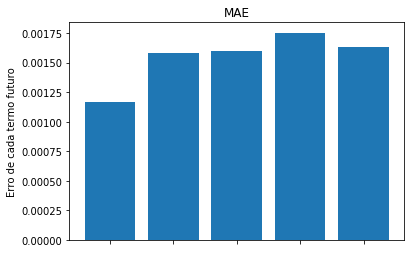

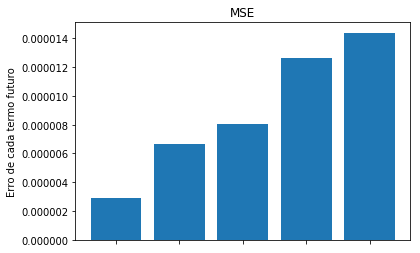

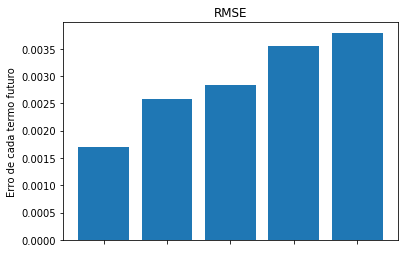

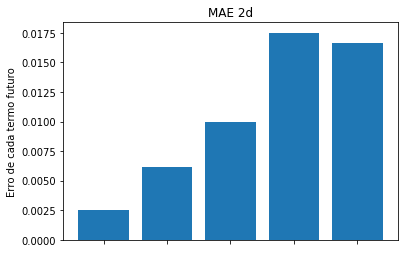

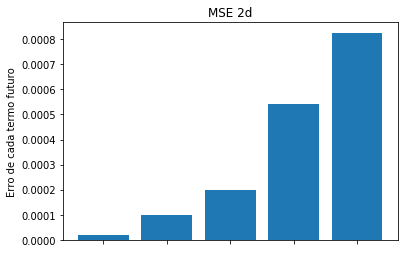

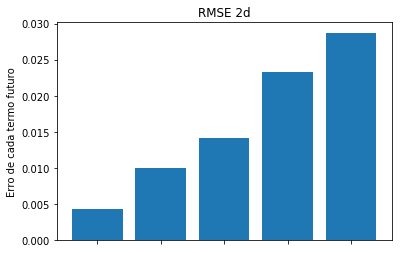

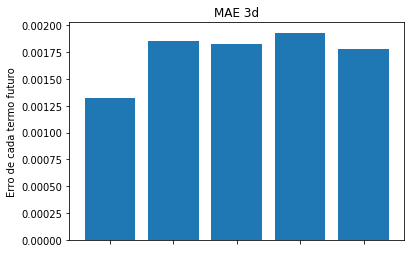

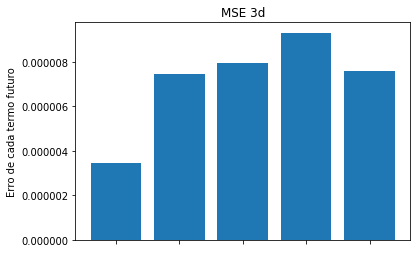

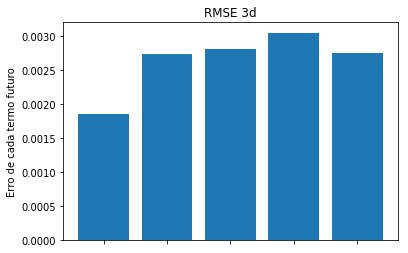

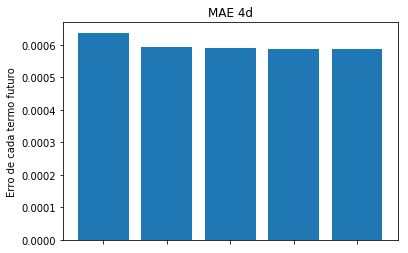

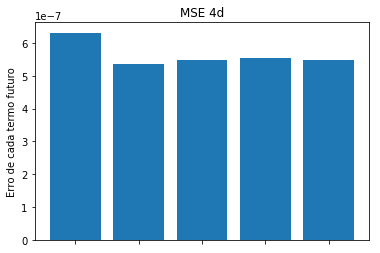

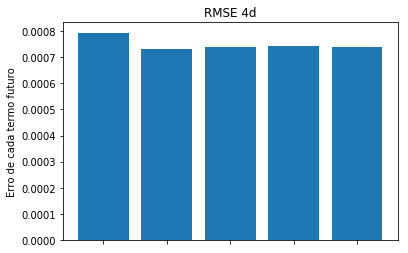

In [12]:

label = []

#plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [13]:
for i in range(FUTUREerror.shape[0]):
    #print(FUTUREerror[i],menor[i,3])
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/5)

[13.  6.  6.  2.  4.  3.  5.  5.  5. 12.] [771. 409. 327. 288. 294. 284. 304. 335. 424. 844.] [296. 132. 124. 100.  91. 107.  92. 110. 137. 288.]
[0.1856308  0.09401856 0.07854933 0.06703334 0.06686146 0.06772087
 0.06892403 0.07734617 0.09728429 0.19663114] [0.21311475 0.09836066 0.09836066 0.03278689 0.06557377 0.04918033
 0.08196721 0.08196721 0.08196721 0.19672131] [0.18014019 0.09556075 0.07640187 0.06728972 0.06869159 0.06635514
 0.07102804 0.07827103 0.09906542 0.19719626] [0.20040623 0.08937035 0.08395396 0.06770481 0.06161137 0.07244414
 0.06228842 0.07447529 0.09275559 0.19498984]
oi [1.14805707 1.04618335 1.25221509 0.48911307 0.98074087 0.72622119
 1.18924001 1.05974499 0.84255344 1.00045856] [0.97042186 1.01640298 0.972661   1.00382459 1.02737189 0.97983301
 1.03052649 1.01195742 1.01830851 1.002874  ] [1.07959578 0.95056064 1.06880557 1.01001684 0.92147809 1.06974626
 0.90372579 0.96288272 0.95344876 0.9916529 ]


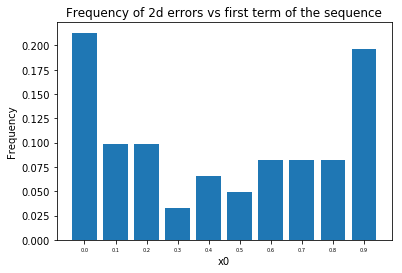

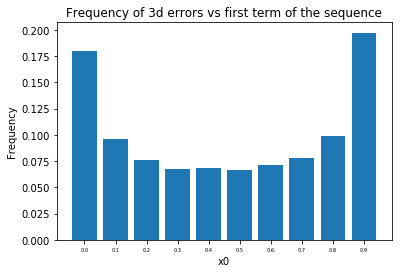

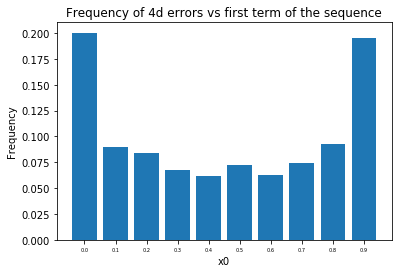

oi [1.14805707 1.04618335 1.25221509 0.48911307 0.98074087 0.72622119
 1.18924001 1.05974499 0.84255344 1.00045856] [0.97042186 1.01640298 0.972661   1.00382459 1.02737189 0.97983301
 1.03052649 1.01195742 1.01830851 1.002874  ] [1.07959578 0.95056064 1.06880557 1.01001684 0.92147809 1.06974626
 0.90372579 0.96288272 0.95344876 0.9916529 ]


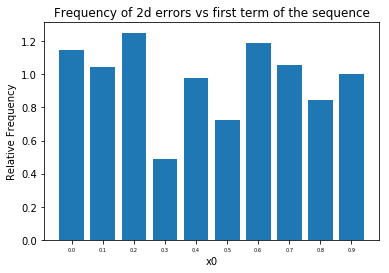

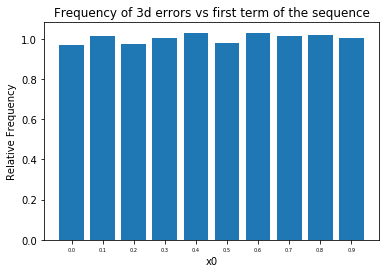

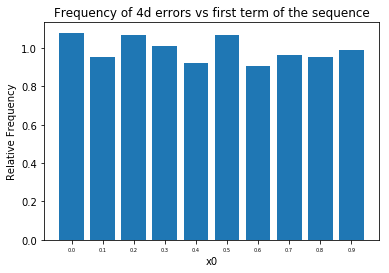

In [14]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[4. 3. 1. 0. 0. 1. 0. 2. 1. 1. 1. 0. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 2. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 0. 1. 0. 2. 1. 0. 0. 0. 1. 0. 2.
 1. 1. 3. 4.] [198. 117.  88.  59.  63.  53.  57.  49.  51.  36.  46.  51.  49.  48.
  38.  35.  44.  35.  38.  25.  44.  32.  27.  33.  36.  23.  27.  42.
  29.  34.  25.  34.  20.  33.  28.  31.  26.  33.  33.  25.  37.  27.
  31.  28.  17.  33.  24.  41.  23.  33.  30.  34.  29.  20.  27.  21.
  27.  38.  28.  30.  36.  37.  25.  32.  25.  40.  30.  22.  24.  33.
  34.  34.  29.  25.  36.  39.  36.  35.  31.  36.  43.  28.  32.  44.
  35.  40.  37.  47.  54.  64.  38.  53.  56.  48.  52.  54.  79.  83.
 125. 256.] [83. 43. 28. 22. 23. 27. 18. 22. 11. 19. 12. 11. 15. 21. 11. 11. 15. 15.
 11. 10. 18.  8. 12.  8. 13. 16. 15. 11. 13. 10. 13.  8.  6.  8. 13. 11.
 11. 10.  7. 13.  7. 11. 10.  7. 15.  8

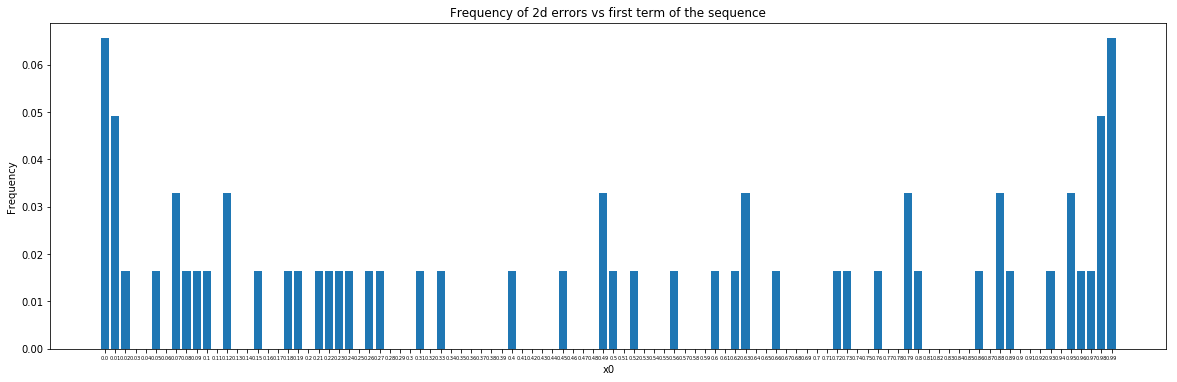

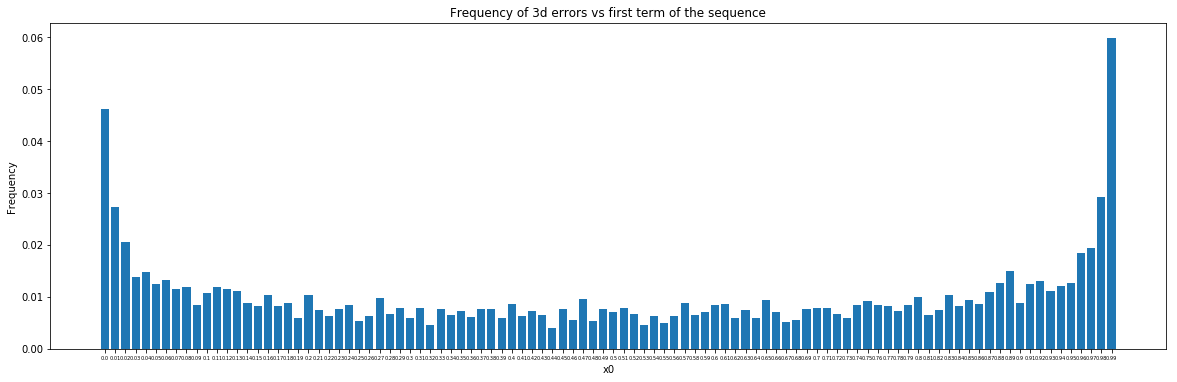

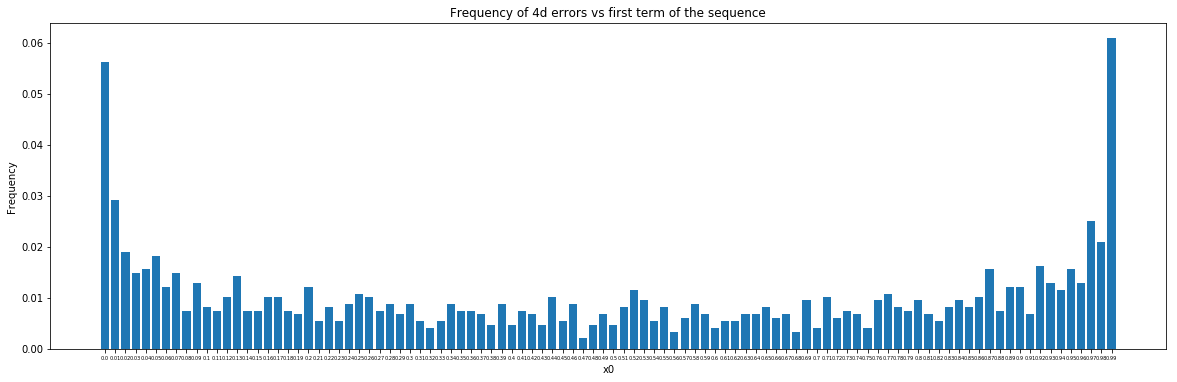

oi [1.33862525 1.75540581 0.81518845 0.         0.         1.17749443
 0.         2.61306984 1.51392142 1.70316159 1.61656016 0.
 2.89021361 0.         0.         2.02929892 0.         0.
 1.90754098 2.64936248 0.         2.32626949 2.38442623 2.27088212
 1.90754098 0.         2.21807091 1.76624165 0.         0.
 0.         2.21807091 0.         2.27088212 0.         0.
 0.         0.         0.         0.         2.11948998 0.
 0.         0.         0.         2.27088212 0.         0.
 0.         4.23897996 2.50992235 0.         2.02929892 0.
 0.         0.         2.89021361 0.         0.         0.
 2.21807091 0.         2.80520733 4.33532042 0.         0.
 2.38442623 0.         0.         0.         0.         0.
 2.44556536 2.57775809 0.         0.         1.87013822 0.
 0.         3.89294078 1.64443188 0.         0.         0.
 0.         0.         1.79956697 0.         2.84707609 1.14912107
 0.         0.         0.         1.40260366 0.         2.41460884
 0.96340454 0.7882400

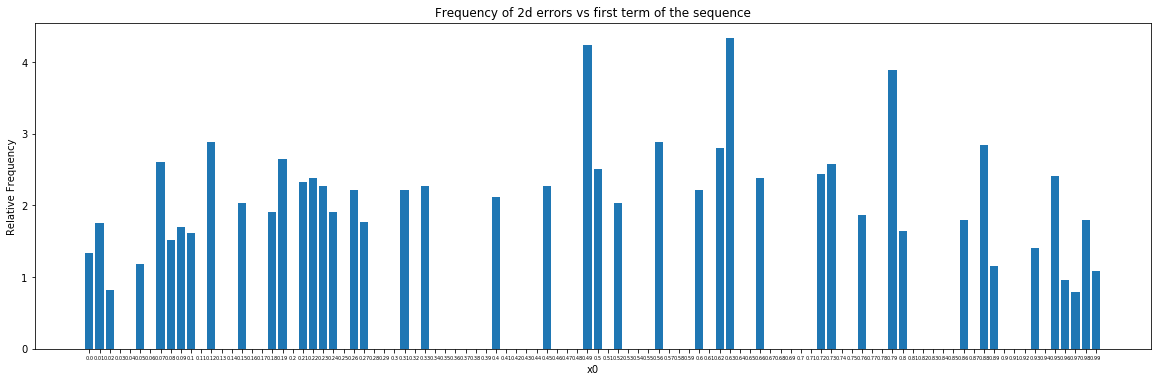

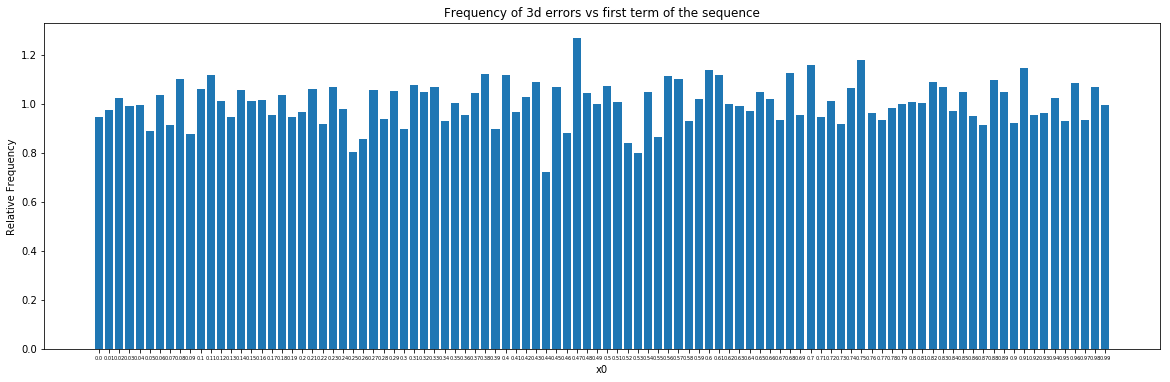

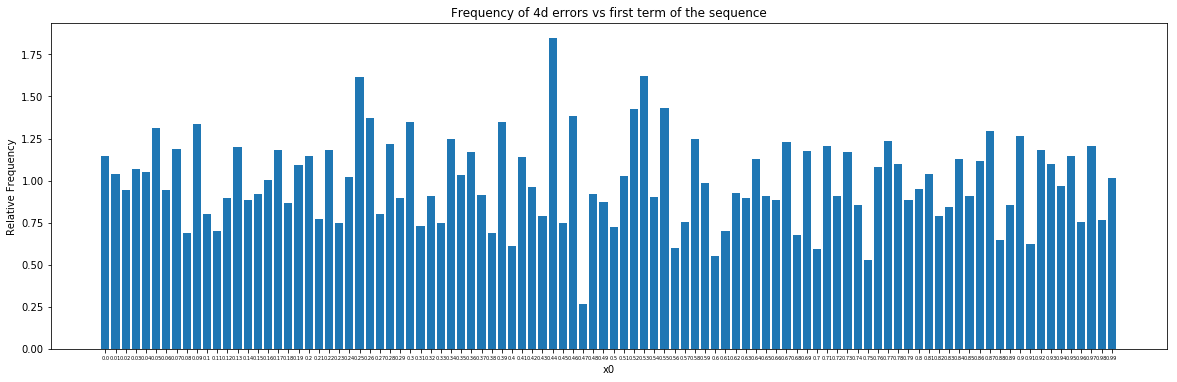

In [15]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


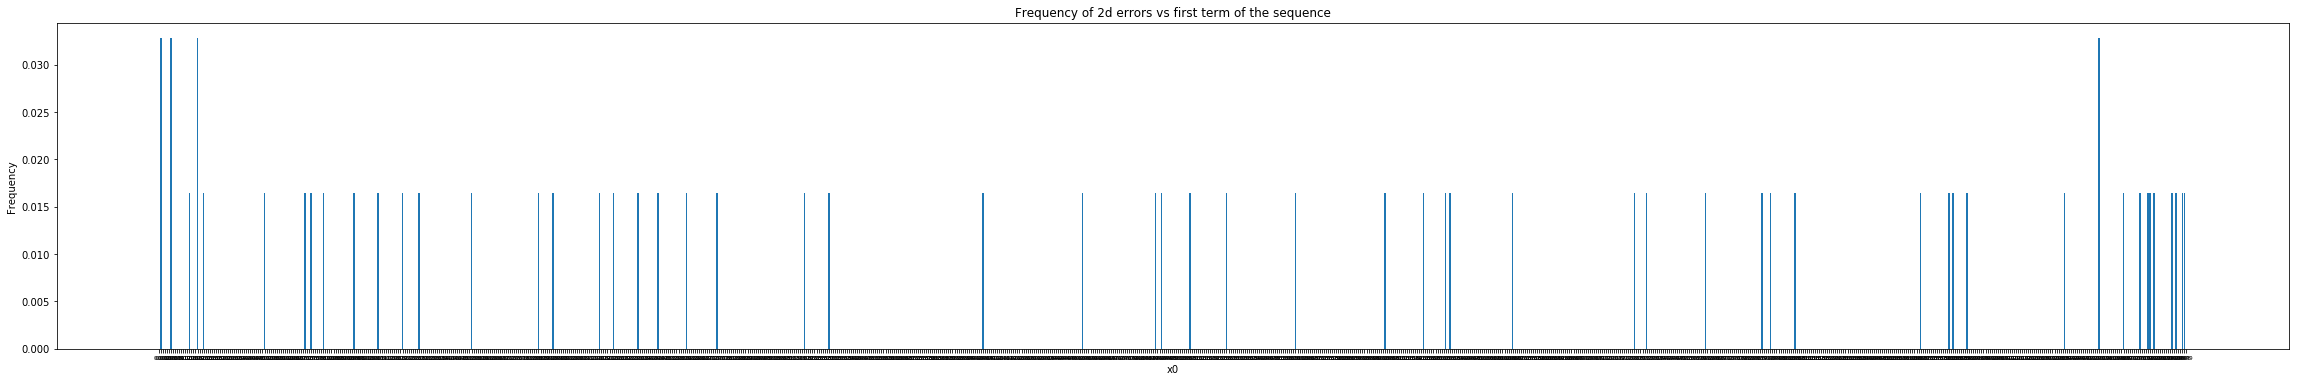

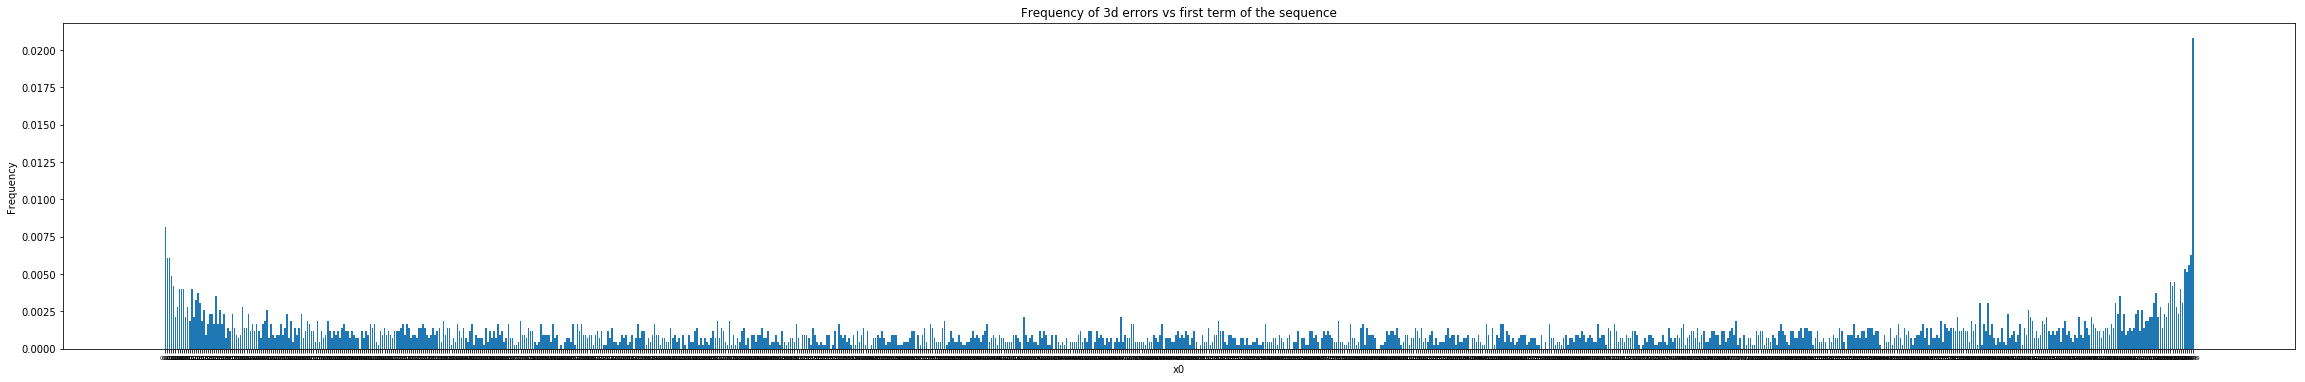

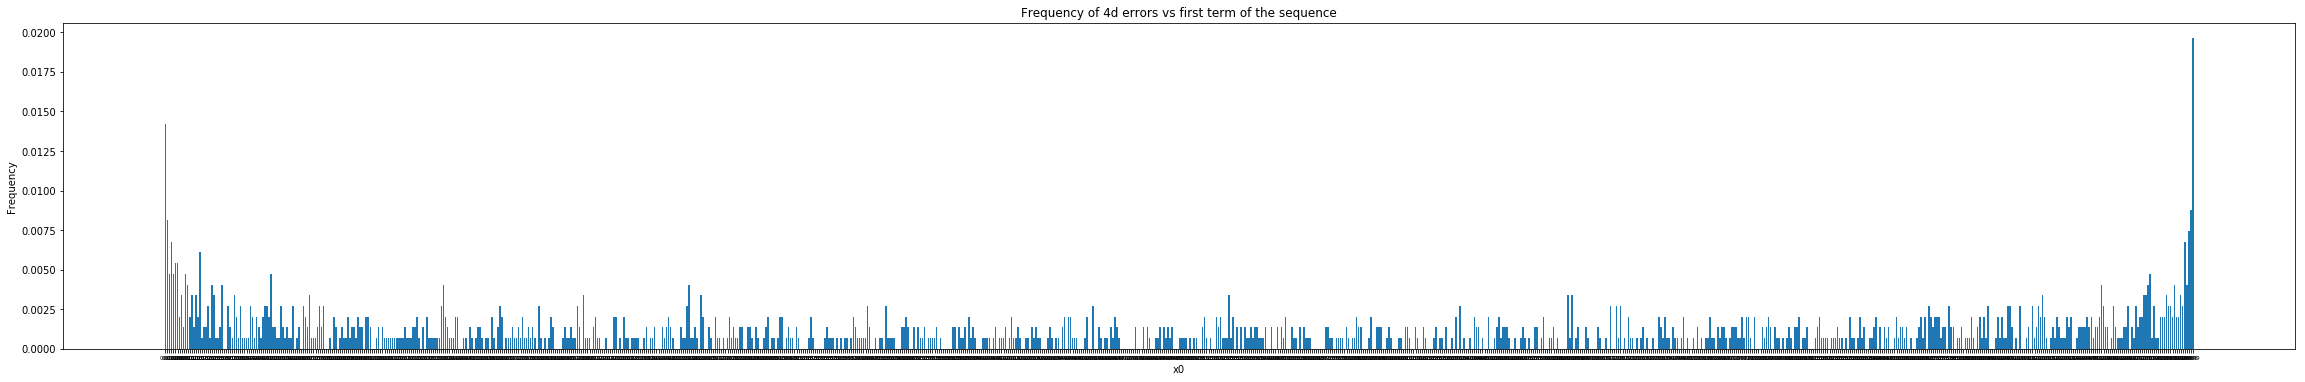

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


oi [ 0.          4.76885246  0.          0.          0.          0.
  8.67064083  0.          0.          0.          0.          0.
  0.          0.          0.          4.76885246  0.          0.
  0.         12.71693989  0.          0.          7.94808743  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          6.35846995  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 13.62529274  0.          0.          8.67064083  0.          0.
  0.          0.          0.         13.62529274  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.      

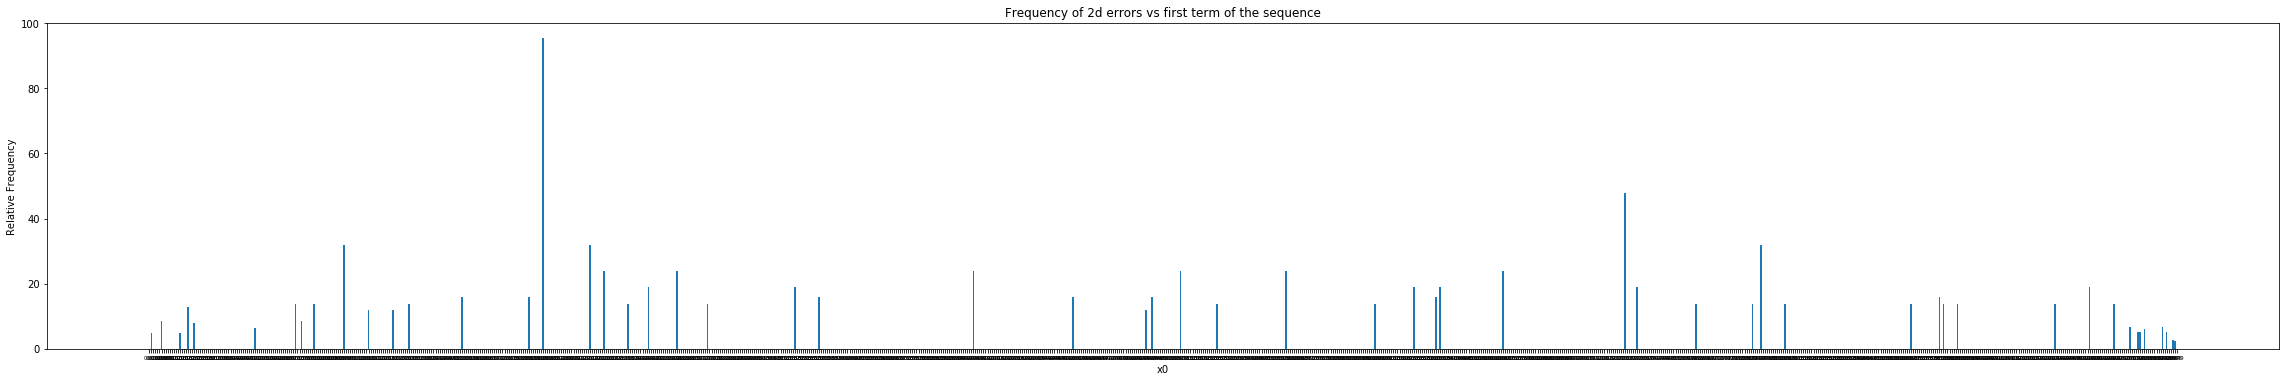

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


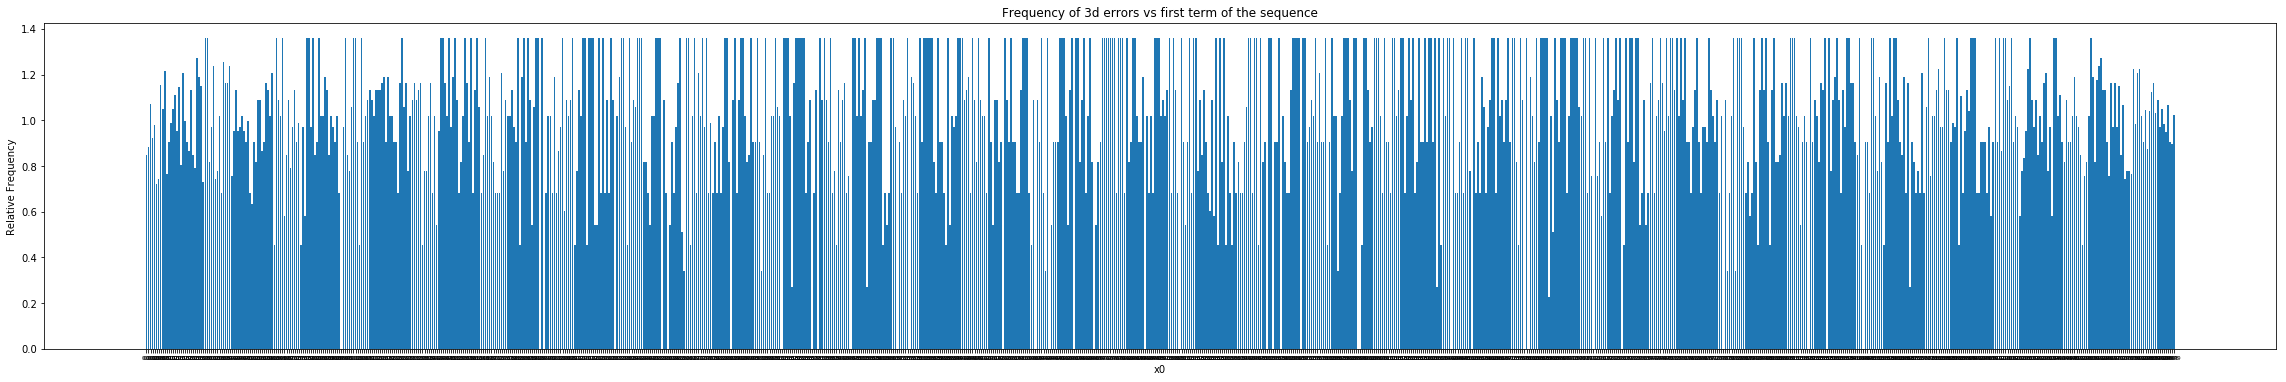

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


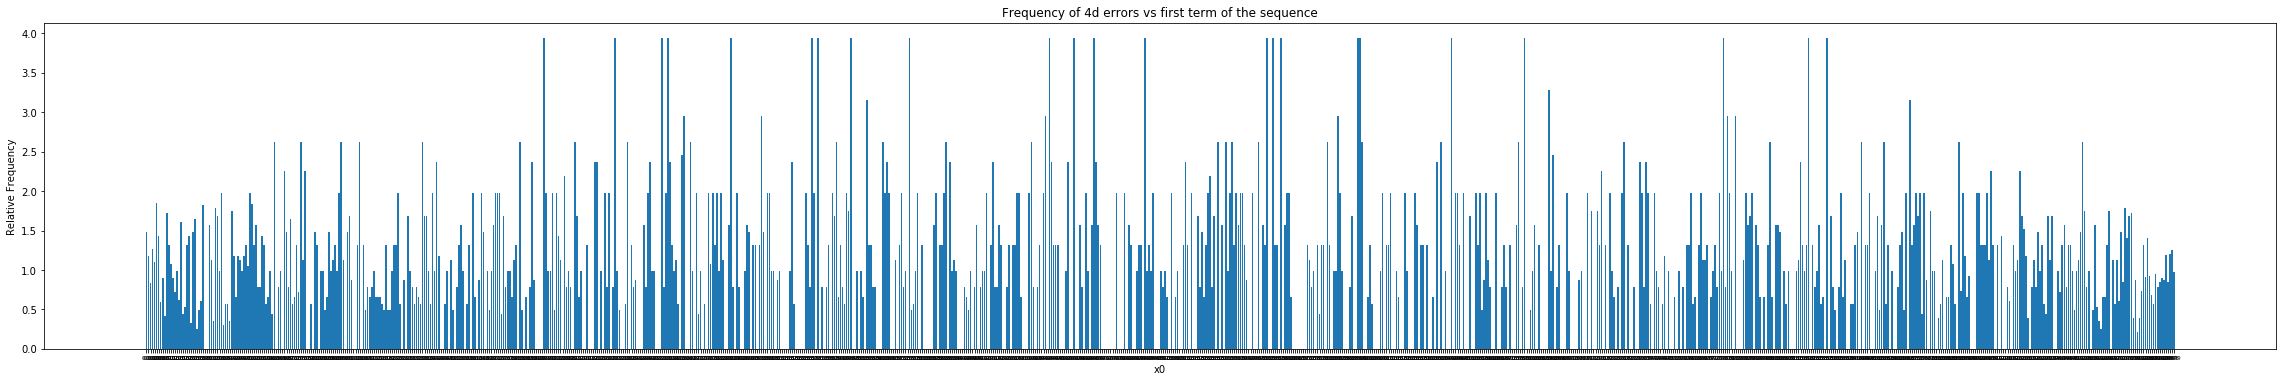

In [16]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

mae [0.00116318679323062, 0.0015796729252613097, 0.0015963678039972943, 0.001753022304751428] 
 mse [2.8866710989939523e-06, 6.660498057555377e-06, 8.059368556728595e-06, 1.2658064763343236e-05] 
 rmse [0.0016990206293609129, 0.0025807940750000526, 0.0028389027029344623, 0.00355781741568384] 

mae [0.002551999728570061, 0.006179869837047392, 0.00999728525627702, 0.017506525698726662] 
 mse [1.859599321148875e-05, 9.905766553763928e-05, 0.00019884094228586832, 0.0005405194172220455] 
 rmse [0.004312307179630035, 0.009952771751509189, 0.014101097201489972, 0.02324907347018469] 

mae [0.001324840645010077, 0.0018543027576028845, 0.001823364545930226, 0.0019310419269392468] 
 mse [3.441100854885355e-06, 7.457231566963148e-06, 7.93254895022168e-06, 9.311659762480586e-06] 
 rmse [0.0018550204459480643, 0.0027307932120472153, 0.002816478111085133, 0.0030515012309485614] 

mae [0.001324840645010077, 0.0018543027576028845, 0.001823364545930226, 0.0019310419269392468] 
 mse [3.441100854885355e-0

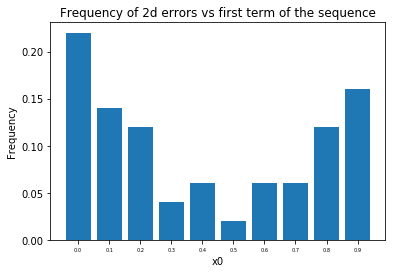

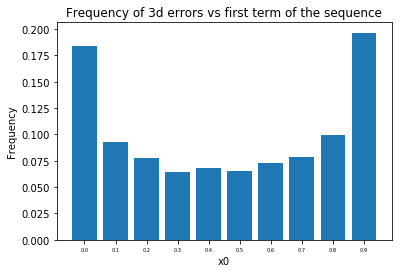

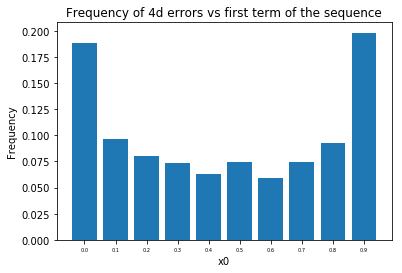

oi [1.18514815 1.48906764 1.52770241 0.59671795 0.89737789 0.29532995
 0.87052369 0.77573333 1.23349823 0.81370629] [0.99220967 0.98212432 0.9848278  0.96351191 1.02475619 0.96823547
 1.06178806 1.01919777 1.01731293 0.9991482 ] [1.01324576 1.02850022 1.02087032 1.09949504 0.94358721 1.09703932
 0.85546746 0.96051887 0.95154885 1.00753727]


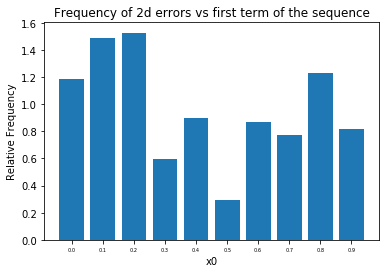

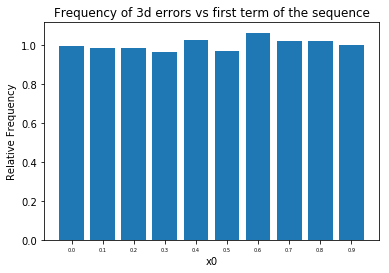

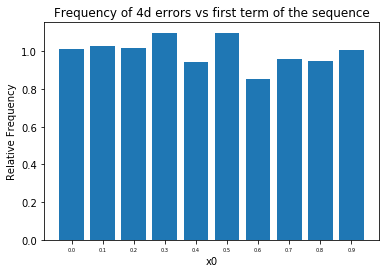

[5. 2. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 2. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 2. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 3.] [190. 108.  87.  58.  66.  53.  53.  53.  49.  33.  44.  49.  45.  47.
  35.  29.  37.  32.  34.  24.  42.  30.  24.  32.  36.  21.  27.  42.
  28.  33.  26.  31.  19.  32.  24.  31.  22.  28.  29.  21.  40.  25.
  31.  25.  18.  30.  22.  39.  19.  30.  28.  31.  27.  20.  24.  22.
  25.  35.  24.  31.  35.  36.  23.  31.  26.  39.  32.  24.  24.  28.
  31.  32.  22.  26.  36.  36.  37.  34.  30.  37.  40.  28.  29.  45.
  34.  36.  33.  44.  51.  63.  36.  47.  56.  49.  55.  48.  73.  78.
 116. 242.] [ 90.  53.  30.  23.  20.  27.  21.  19.  14.  22.  14.  13.  19.  22.
  13.  17.  22.  18.  15.  11.  20.  10.  15.   9.  13.  18.  15.  11.
  14.  11.  12.  12.   7.   9.  17.  11.  1

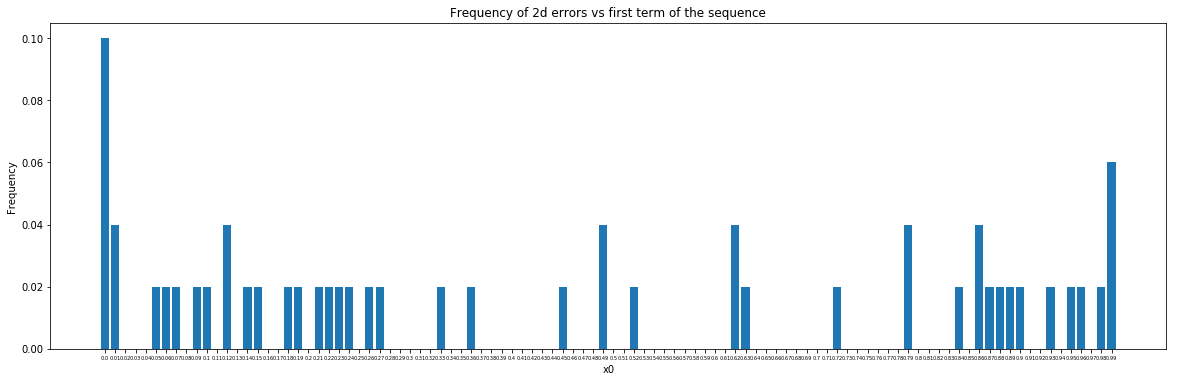

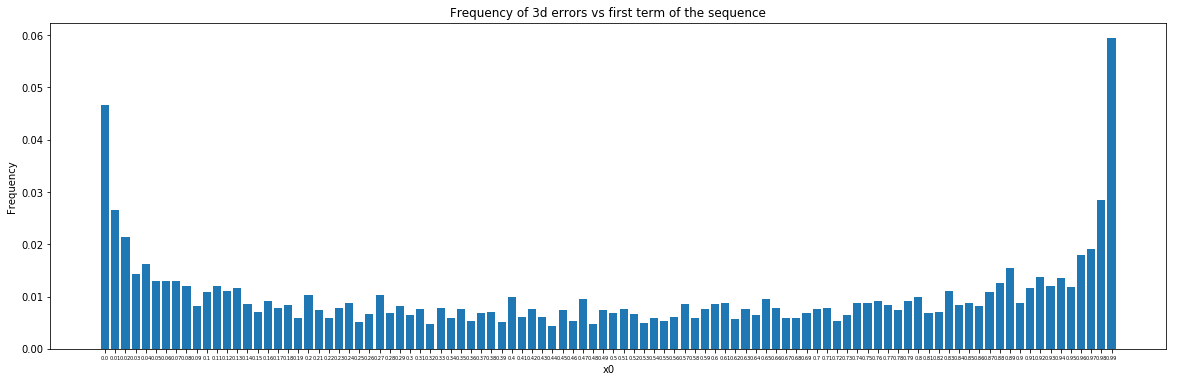

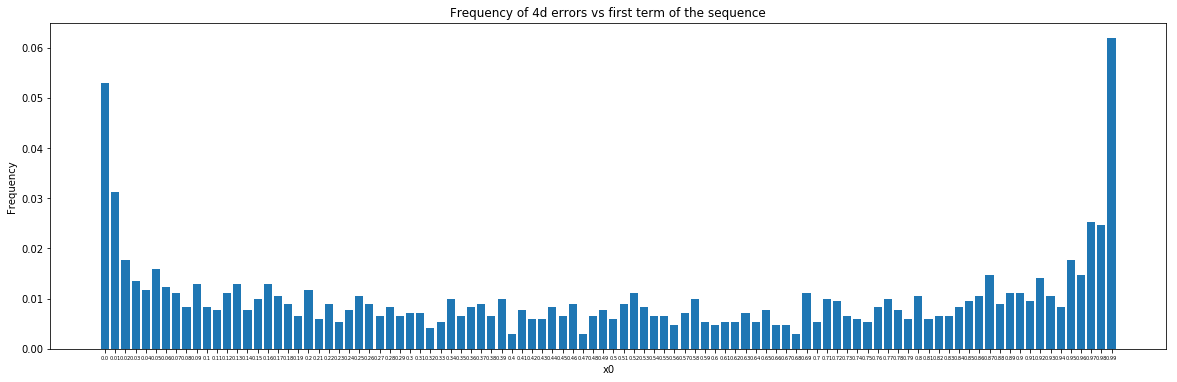

oi [2.04140351 1.42773006 0.         0.         0.         1.43654321
 1.55146667 1.5939726  0.         2.07785714 1.97220339 0.
 3.52606061 0.         2.37469388 2.47574468 0.         0.
 2.3272     3.23222222 0.         2.83804878 2.909      2.77047619
 2.3272     0.         2.70604651 2.15481481 0.         0.
 0.         0.         0.         2.77047619 0.         0.
 3.14486486 0.         0.         0.         0.         0.
 0.         0.         0.         2.77047619 0.         0.
 0.         5.17155556 0.         0.         2.47574468 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         6.84470588 2.64454545 0.         0.
 0.         0.         0.         0.         0.         0.
 2.98358974 0.         0.         0.         0.         0.
 0.         4.74938776 0.         0.         0.         0.
 2.37469388 0.         4.3909434  1.66228571 1.73671642 1.40192771
 2.07785714 0.         0.         1.71117647 0.         1.47291139
 1.17535354 0.       

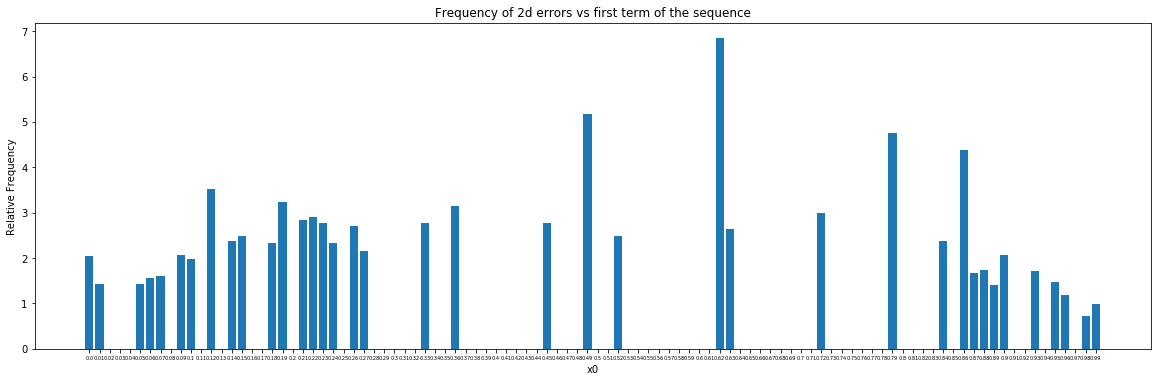

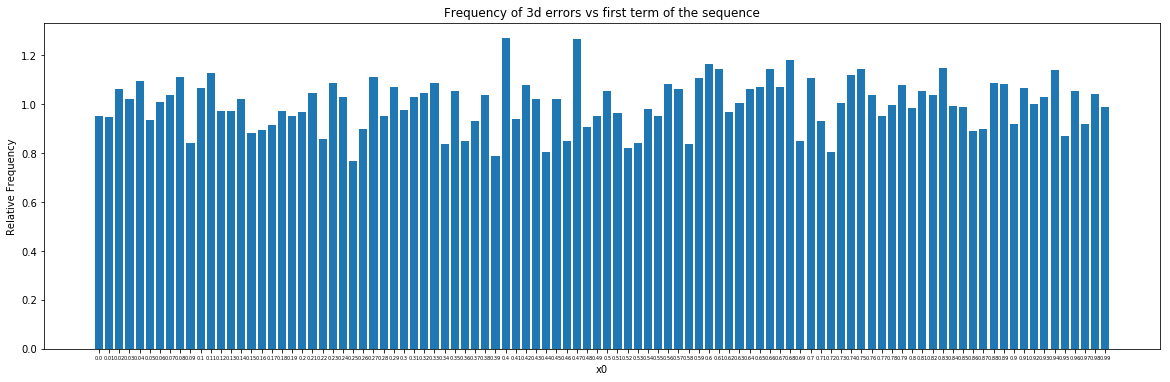

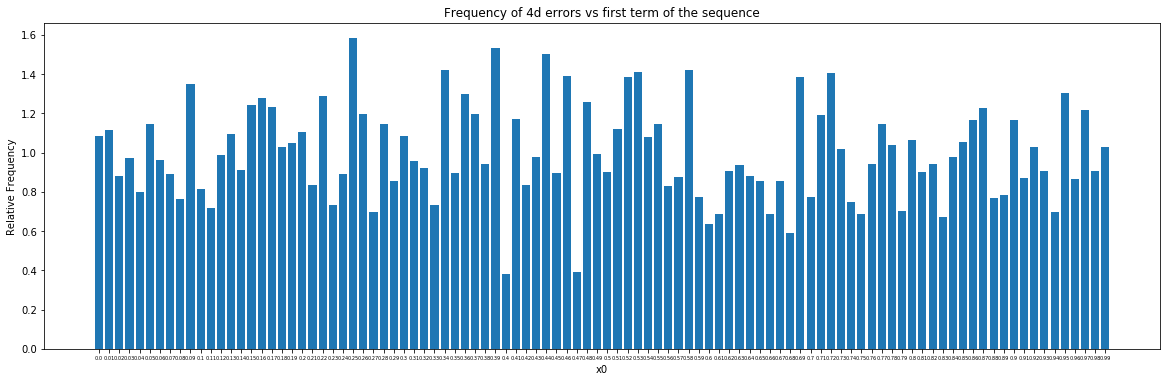

[0. 2. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in true_divide


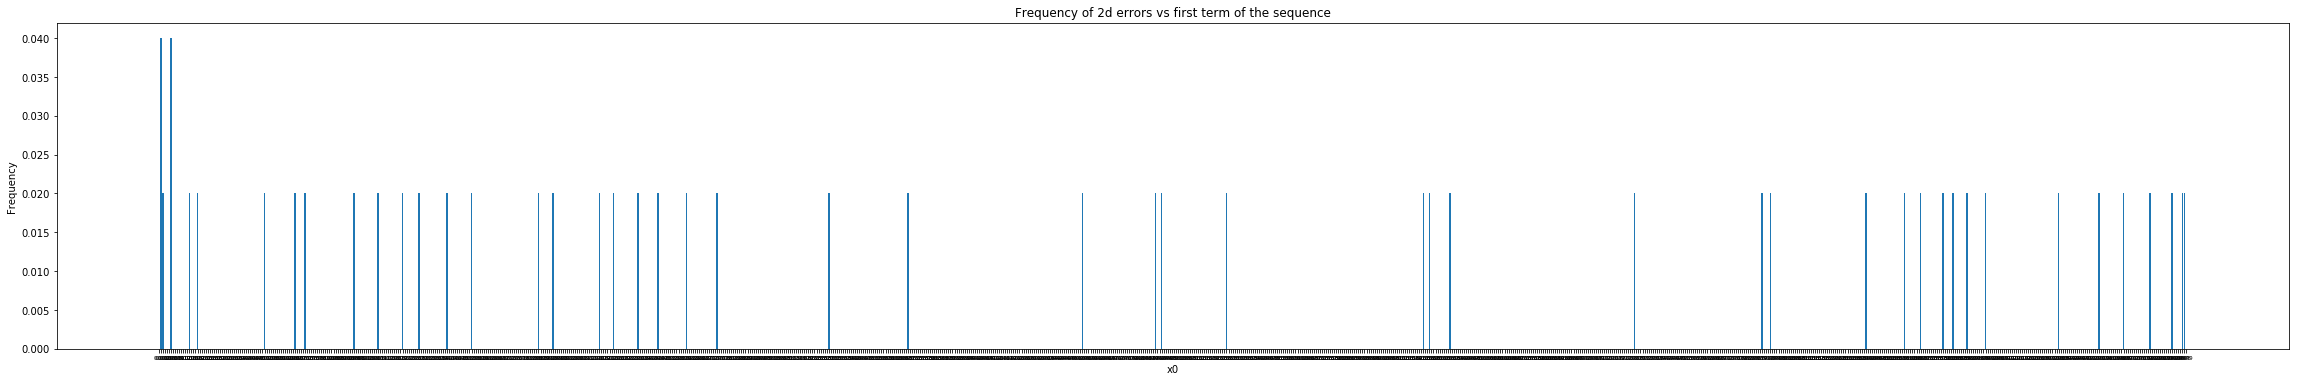

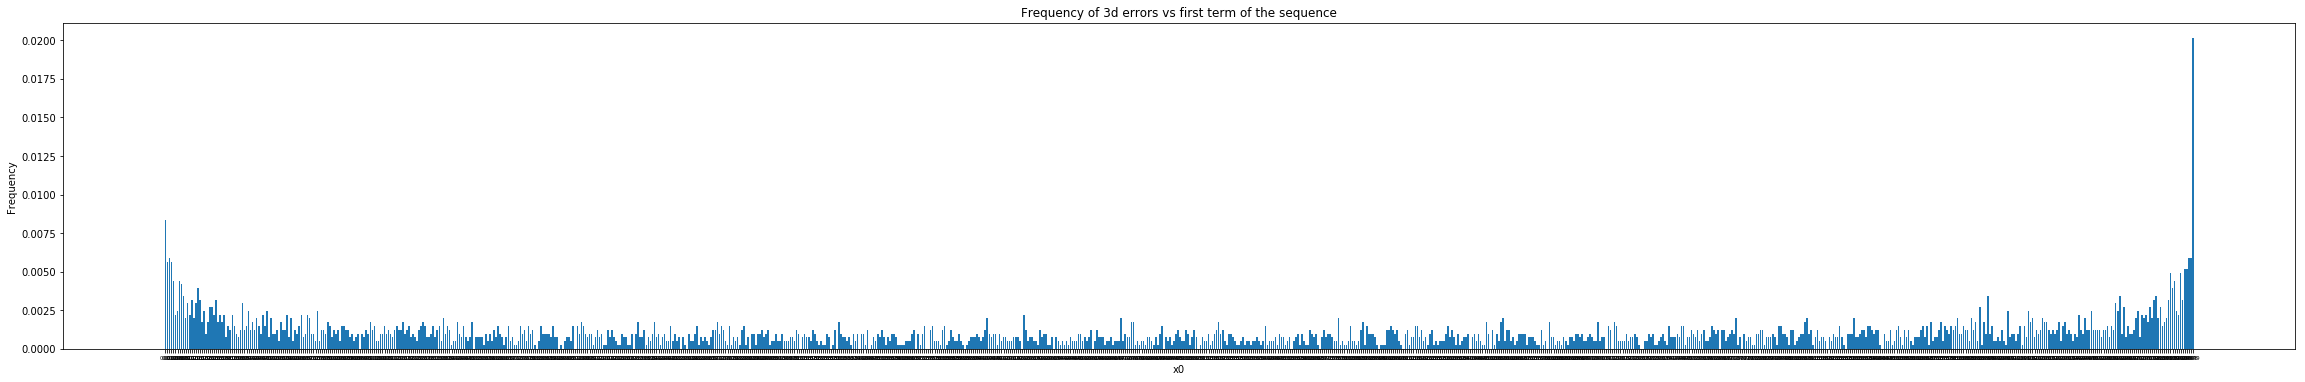

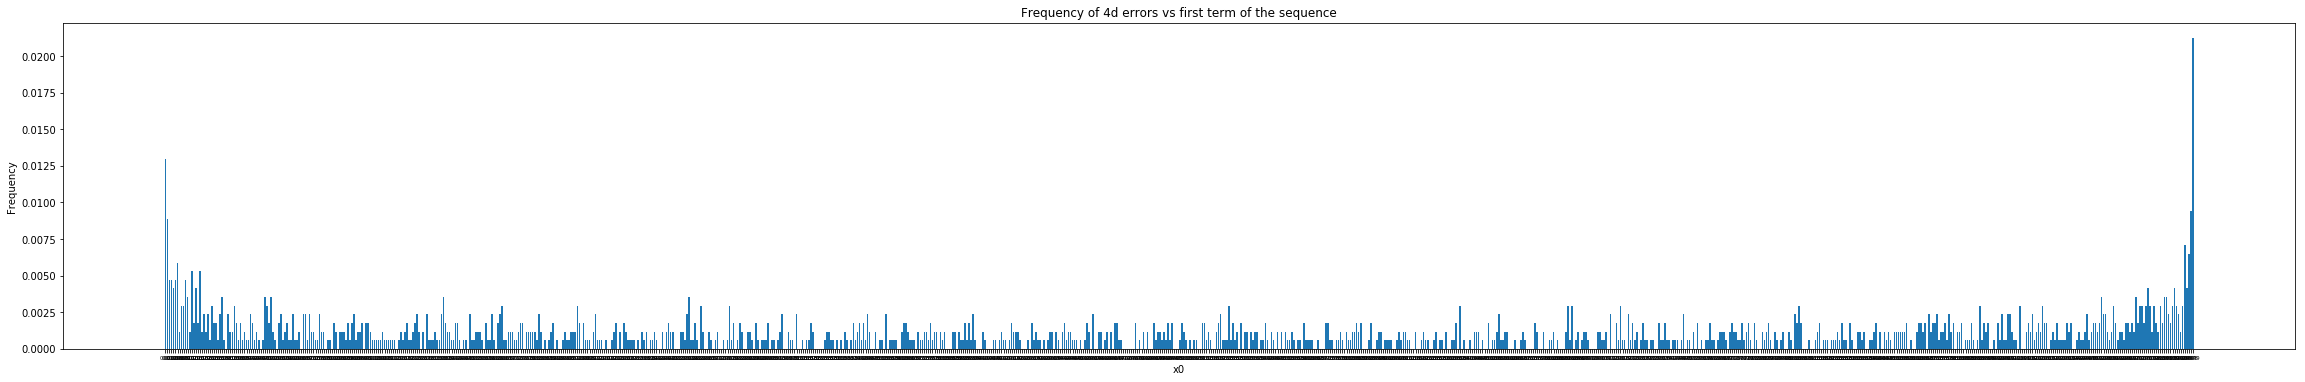

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:258: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:260: RuntimeWarning: invalid value encountered in true_divide


oi [  0.           5.818        3.52606061   0.           0.
   0.          10.57818182   0.           0.           0.
   0.           0.           0.           0.           0.
   5.818        0.           0.           0.           7.75733333
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           7.75733333   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.          11.636        0.           0.
   0.           0.          16.62285714   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   

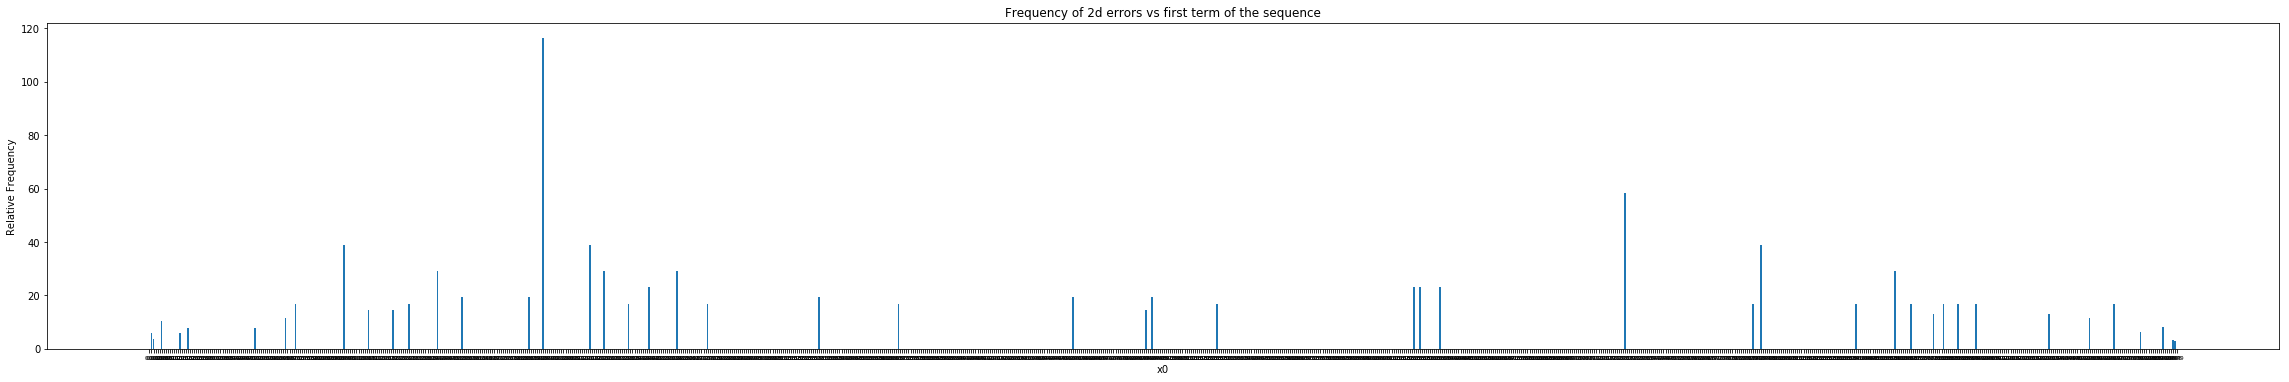

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:268: RuntimeWarning: invalid value encountered in true_divide


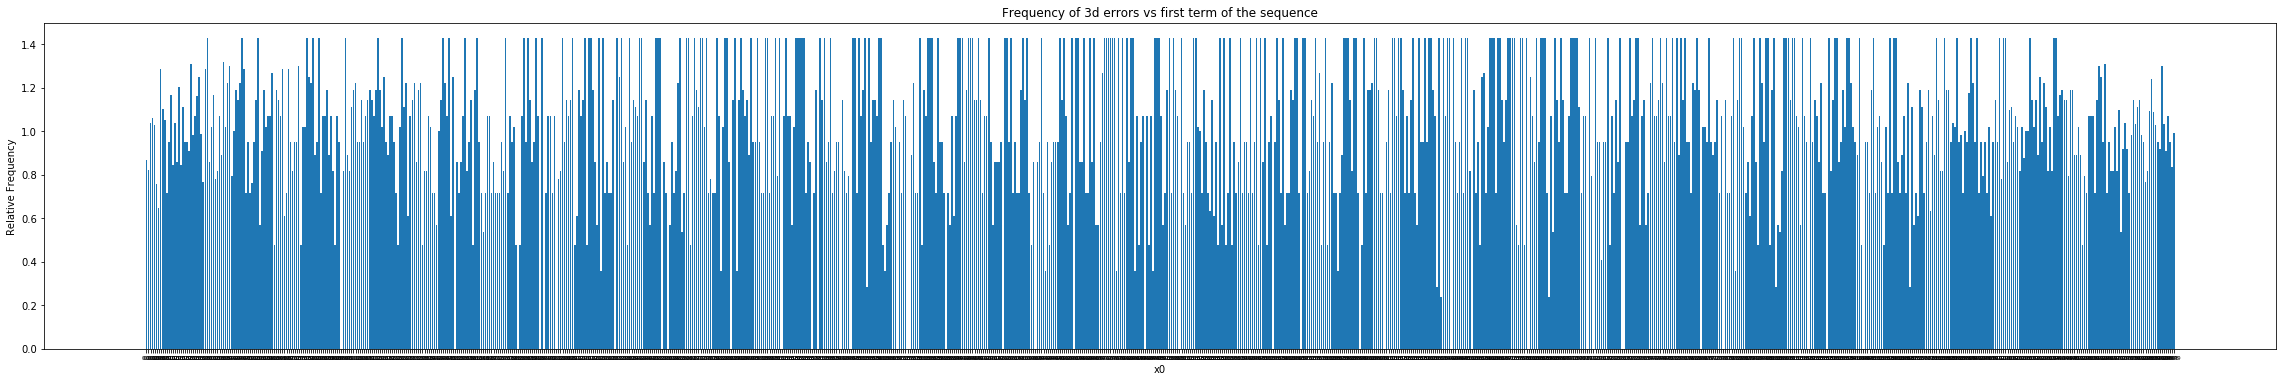

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:276: RuntimeWarning: invalid value encountered in true_divide


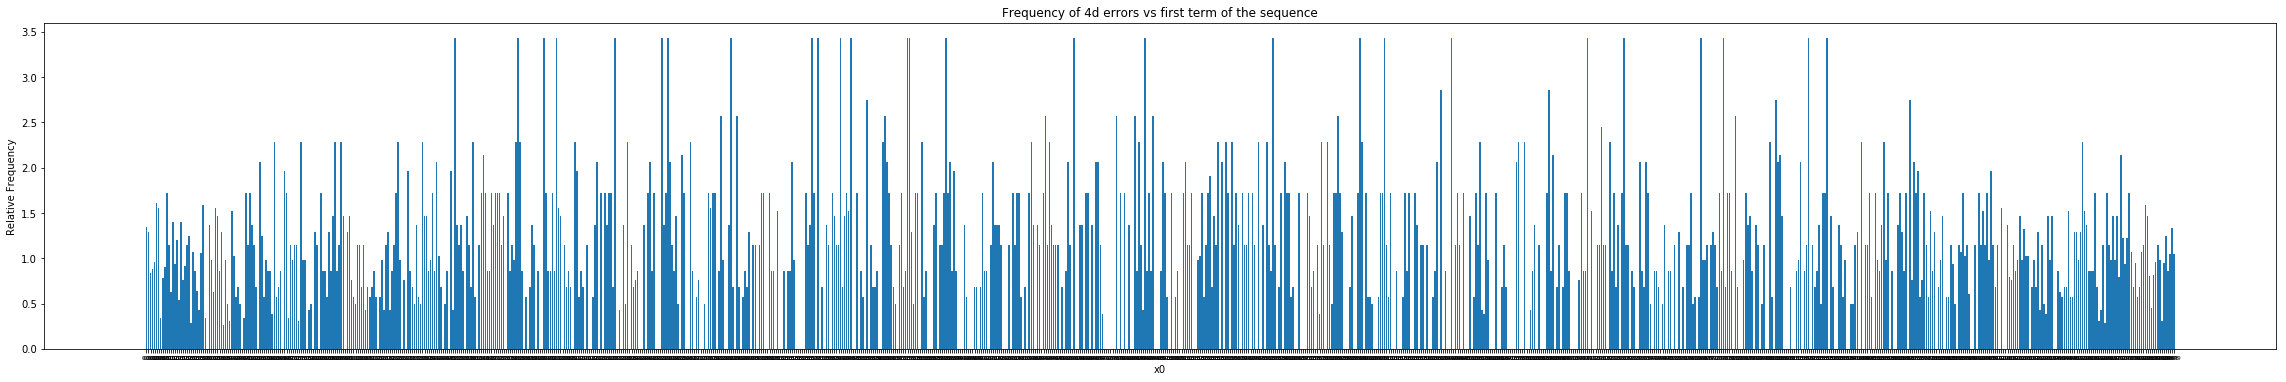

In [17]:
FUTUREerror = FUTUREerror[:,0:4]
FUTUREerror2d = FUTUREerror2d[:,0:4]
FUTUREerror3d = FUTUREerror3d[:,0:4]
FUTUREerror4d = FUTUREerror4d[:,0:4]
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/4)
    
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()